In [1]:
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [4]:
raw_data=pd.read_csv('global_electricity_production_data.csv')
raw_data.head(3)

,country_name,date,parameter,product,value,unit
0,Australia,12/1/2023,Net Electricity Production,Electricity,22646.1901,GWh
1,Australia,12/1/2023,Net Electricity Production,Total Combustible Fuels,13397.9356,GWh
2,Australia,12/1/2023,Net Electricity Production,"Coal, Peat and Manufactured Gases",9768.5223,GWh


In [5]:
raw_data.nunique()

country_name        48
date               168
parameter            7
product             16
value           101983
unit                 1
dtype: int64

In [6]:
raw_data['parameter'].value_counts()

parameter
Net Electricity Production        93318
Final Consumption (Calculated)     6036
Distribution Losses                6033
Total Exports                      5416
Total Imports                      5411
Used for pumped storage            4846
Remarks                              14
Name: count, dtype: int64

In [8]:
net_elect_prod=raw_data[raw_data['parameter']=='Net Electricity Production'].drop('parameter',axis=1)
net_elect_prod

,country_name,date,product,value,unit
0,Australia,12/1/2023,Electricity,22646.1901,GWh
1,Australia,12/1/2023,Total Combustible Fuels,13397.9356,GWh
2,Australia,12/1/2023,"Coal, Peat and Manufactured Gases",9768.5223,GWh
3,Australia,12/1/2023,Oil and Petroleum Products,289.5415,GWh
4,Australia,12/1/2023,Natural Gas,3091.9272,GWh
...,...,...,...,...,...
121064,United States,1/1/2010,Wind,6964.9640,GWh
121065,United States,1/1/2010,Solar,28.8680,GWh
121066,United States,1/1/2010,Geothermal,1333.3780,GWh
121067,United States,1/1/2010,Not Specified,286.2500,GWh


In [9]:
net_elect_prod['product'].unique()

array(['Electricity', 'Total Combustible Fuels',
       'Coal, Peat and Manufactured Gases', 'Oil and Petroleum Products',
       'Natural Gas', 'Combustible Renewables', 'Hydro', 'Wind', 'Solar',
       'Total Renewables (Hydro, Geo, Solar, Wind, Other)',
       'Other Combustible Non-Renewables', 'Geothermal', 'Not Specified',
       'Nuclear', 'Other Renewables'], dtype=object)

In [10]:
net_elect_prod['product'].value_counts()

product
Electricity                                          7188
Total Combustible Fuels                              7188
Total Renewables (Hydro, Geo, Solar, Wind, Other)    7188
Hydro                                                7070
Oil and Petroleum Products                           7066
Combustible Renewables                               7049
Wind                                                 7040
Natural Gas                                          6923
Solar                                                6898
Coal, Peat and Manufactured Gases                    6525
Other Combustible Non-Renewables                     6147
Not Specified                                        5098
Nuclear                                              4814
Geothermal                                           4267
Other Renewables                                     2857
Name: count, dtype: int64

In [11]:
net_elect_prod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93318 entries, 0 to 121068
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  93318 non-null  object 
 1   date          93318 non-null  object 
 2   product       93318 non-null  object 
 3   value         93318 non-null  float64
 4   unit          93318 non-null  object 
dtypes: float64(1), object(4)
memory usage: 4.3+ MB


In [12]:
net_elect_prod_GWh=net_elect_prod.drop('unit', axis=1)
net_elect_prod_GWh.head(3)

,country_name,date,product,value
0,Australia,12/1/2023,Electricity,22646.1901
1,Australia,12/1/2023,Total Combustible Fuels,13397.9356
2,Australia,12/1/2023,"Coal, Peat and Manufactured Gases",9768.5223


In [14]:
net_elect_prod_GWh=net_elect_prod_GWh[net_elect_prod_GWh['product']=='Electricity'].drop('product', axis=1)
net_elect_prod_GWh

,country_name,date,value
0,Australia,12/1/2023,22646.1901
13,Austria,12/1/2023,6783.2730
31,Belgium,12/1/2023,6799.1069
49,Canada,12/1/2023,55982.2209
68,Chile,12/1/2023,7734.9912
...,...,...,...
120981,Sweden,1/1/2010,14738.5560
120998,Switzerland,1/1/2010,5537.5930
121015,Turkey,1/1/2010,16830.7920
121035,United Kingdom,1/1/2010,37509.6510


In [26]:
len(net_elect_prod_GWh[net_elect_prod_GWh['date']=='12/1/2023']['date'].values.tolist())

48

In [28]:
len(net_elect_prod_GWh['country_name'].unique().tolist())

48

In [29]:
net_elect_prod_GWh['date']=pd.to_datetime(net_elect_prod_GWh['date'])

In [32]:
net_elect_prod_GWh=net_elect_prod_GWh.pivot(index='country_name', columns='date', values='value')
net_elect_prod_GWh

date,2010-01-01,2010-02-01,2010-03-01,2010-04-01,2010-05-01,2010-06-01,2010-07-01,2010-08-01,2010-09-01,2010-10-01,...,2023-03-01,2023-04-01,2023-05-01,2023-06-01,2023-07-01,2023-08-01,2023-09-01,2023-10-01,2023-11-01,2023-12-01
country_name,,,,,,,,,,,,,,,,,,,,,
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13018.0789,8722.6379,10040.8243,11776.6971,11650.7211,10868.5127,9941.7369,9363.0944,10202.0910,10776.9242
Australia,20739.227,19137.652,19473.694,18089.041,19796.108,20162.666,21142.735,21105.796,19778.190,19057.644,...,22620.5048,20129.2911,22309.8804,22282.0467,22823.7483,22195.8029,20263.3610,21026.1123,21015.1401,22646.1901
Austria,5901.466,5300.597,5566.013,4370.701,5515.343,6054.398,5818.766,5867.877,5696.963,5630.271,...,5474.7154,5874.5447,7008.3825,5510.4519,5290.5728,5744.2075,4950.0440,4531.6551,6253.6453,6783.2730
Belgium,8340.712,7732.280,8157.389,7456.362,7650.280,7035.942,7365.023,7609.426,7270.470,7587.866,...,7386.9194,6243.9250,5840.4130,6265.9340,6804.9446,6111.7561,5310.8807,5906.3680,6542.3624,6799.1069
Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58887.7089,54499.7416,56544.3633,54821.4639,56772.6954,57829.3355,57950.8855,60725.5070,60978.0837,61201.3215
Bulgaria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3379.8262,2789.1154,2293.4402,2748.7409,3084.1159,2954.3134,2878.9553,2523.6904,2809.6568,3429.8249
Canada,60331.621,53282.139,52676.441,45701.702,44150.100,43967.815,46823.864,45140.203,41434.952,44636.674,...,57152.6639,49200.7736,48297.3683,46257.8294,49159.7242,47650.4047,44414.2604,45957.7642,52490.1540,55982.2209
Chile,4780.411,4395.951,4471.335,4571.023,4729.729,4891.648,5187.746,5157.991,4878.205,4991.228,...,7763.5385,7399.7964,7566.6412,7580.6705,7820.8138,7808.6998,7502.0961,7484.6426,7261.3720,7734.9912
China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,737253.2436,682028.8786,711430.4723,759684.8016,865976.4828,864559.6312,767669.5075,727392.4945,753247.5605,844669.6596


<Axes: xlabel='date', ylabel='country_name'>

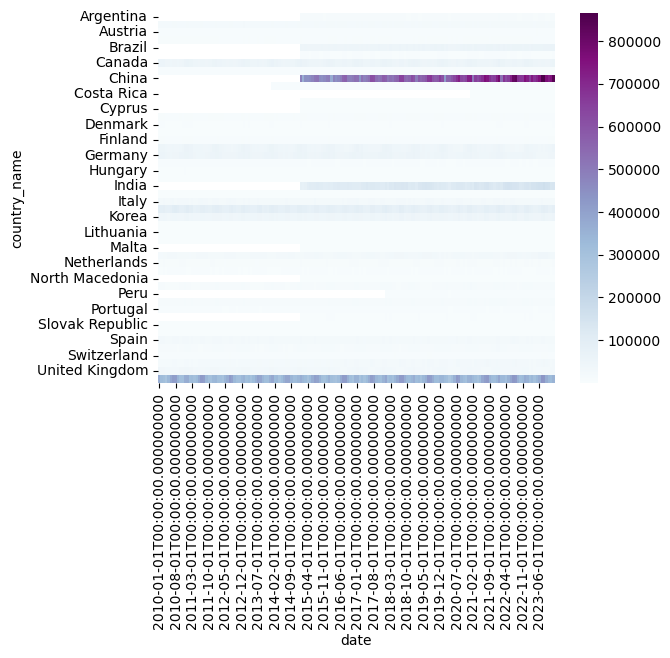

In [36]:
sns.heatmap(
    data=net_elect_prod_GWh,
    cmap='BuPu',
)

In [42]:
#df_piv = df.pivot(index='foo', columns='bar', values='baz')
#def_piv_unpiv = df_piv.reset_index().melt(id_vars='foo', var_name='bar', value_name='baz')
net_elect_prod_GWh=net_elect_prod_GWh.reset_index().melt(id_vars='country_name', var_name='date', value_name='value').dropna(how='any')
net_elect_prod_GWh

,country_name,date,value
1,Australia,2010-01-01 00:00:00,20739.2270
2,Austria,2010-01-01 00:00:00,5901.4660
3,Belgium,2010-01-01 00:00:00,8340.7120
6,Canada,2010-01-01 00:00:00,60331.6210
7,Chile,2010-01-01 00:00:00,4780.4110
...,...,...,...
8059,Sweden,2023-12-01 00:00:00,16112.3848
8060,Switzerland,2023-12-01 00:00:00,5970.9818
8061,Turkey,2023-12-01 00:00:00,26341.2092
8062,United Kingdom,2023-12-01 00:00:00,26452.1550


In [46]:
net_elect_prod_GWh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7188 entries, 1 to 8063
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_name  7188 non-null   object 
 1   date          7188 non-null   object 
 2   value         7188 non-null   float64
dtypes: float64(1), object(2)
memory usage: 224.6+ KB


In [47]:
net_elect_prod_GWh['date']=pd.to_datetime(net_elect_prod_GWh['date'])

In [49]:
net_elect_prod_GWh.insert(2,'year',net_elect_prod_GWh['date'].dt.year)

In [50]:
net_elect_prod_GWh

,country_name,date,year,value
1,Australia,2010-01-01,2010,20739.2270
2,Austria,2010-01-01,2010,5901.4660
3,Belgium,2010-01-01,2010,8340.7120
6,Canada,2010-01-01,2010,60331.6210
7,Chile,2010-01-01,2010,4780.4110
...,...,...,...,...
8059,Sweden,2023-12-01,2023,16112.3848
8060,Switzerland,2023-12-01,2023,5970.9818
8061,Turkey,2023-12-01,2023,26341.2092
8062,United Kingdom,2023-12-01,2023,26452.1550


In [52]:
total_elec_by_country=net_elect_prod_GWh.groupby('country_name')['value'].sum()

<Axes: xlabel='country_name'>

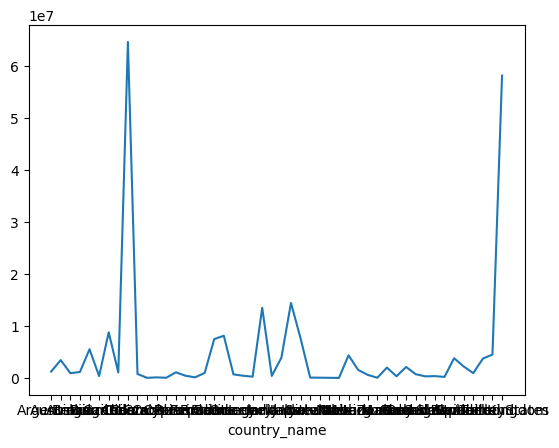

In [53]:
sns.lineplot(
    x=total_elec_by_country.index,
    y=total_elec_by_country.values
)

In [61]:
top5_country=total_elec_by_country.sort_values(ascending=False).head(5).index

In [63]:
top5_country.tolist()

['China', 'United States', 'Japan', 'India', 'Canada']

In [66]:
top5_country_df=net_elect_prod_GWh[net_elect_prod_GWh['country_name'].isin(top5_country)]
top5_country_df.head(3)

,country_name,date,year,value
6,Canada,2010-01-01,2010,60331.621
25,Japan,2010-01-01,2010,97027.586
47,United States,2010-01-01,2010,364271.027


<Axes: xlabel='date', ylabel='value'>

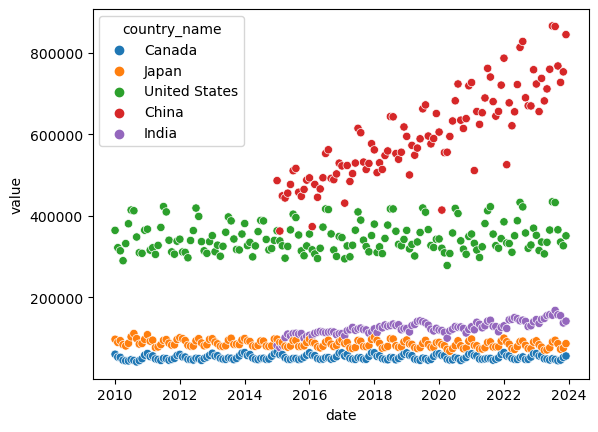

In [67]:
sns.scatterplot(
    data=top5_country_df,
    x='date',
    y='value',
    hue='country_name'
)